# Plotting policy projection

In [1]:
from rl_vcf.validate.utils import (
    load_policy_projection_database,
)
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
alpha = 5.0
alpha_str = str(float(alpha)).replace(".", "-")
policy_projection_database = load_policy_projection_database(
    "../../src/rl_vcf/databases/projection/alpha_{alpha_str}_projection_db.pkl".format(
        alpha_str=alpha_str
    )
)
policy_projection_database.concatenate_lists()

policy_projection_database_alpha_task = load_policy_projection_database(
    "../../src/rl_vcf/databases/projection/alpha_task_{alpha_str}_projection_db.pkl".format(
        alpha_str=alpha_str
    )
)
policy_projection_database_alpha_task.concatenate_lists()

In [3]:
filename = "extracted_frames.pkl"
with open(filename, "rb") as file:
    extracted_frames = pickle.load(file)

filename = "extracted_frames_alpha_task.pkl"
with open(filename, "rb") as file:
    extracted_frames_alpha_task = pickle.load(file)

/home/jacques/projects/rl-vcf/src/rl_vcf/validate/utils.py:1073: RuntimeWarning: divide by zero encountered in divide
  1


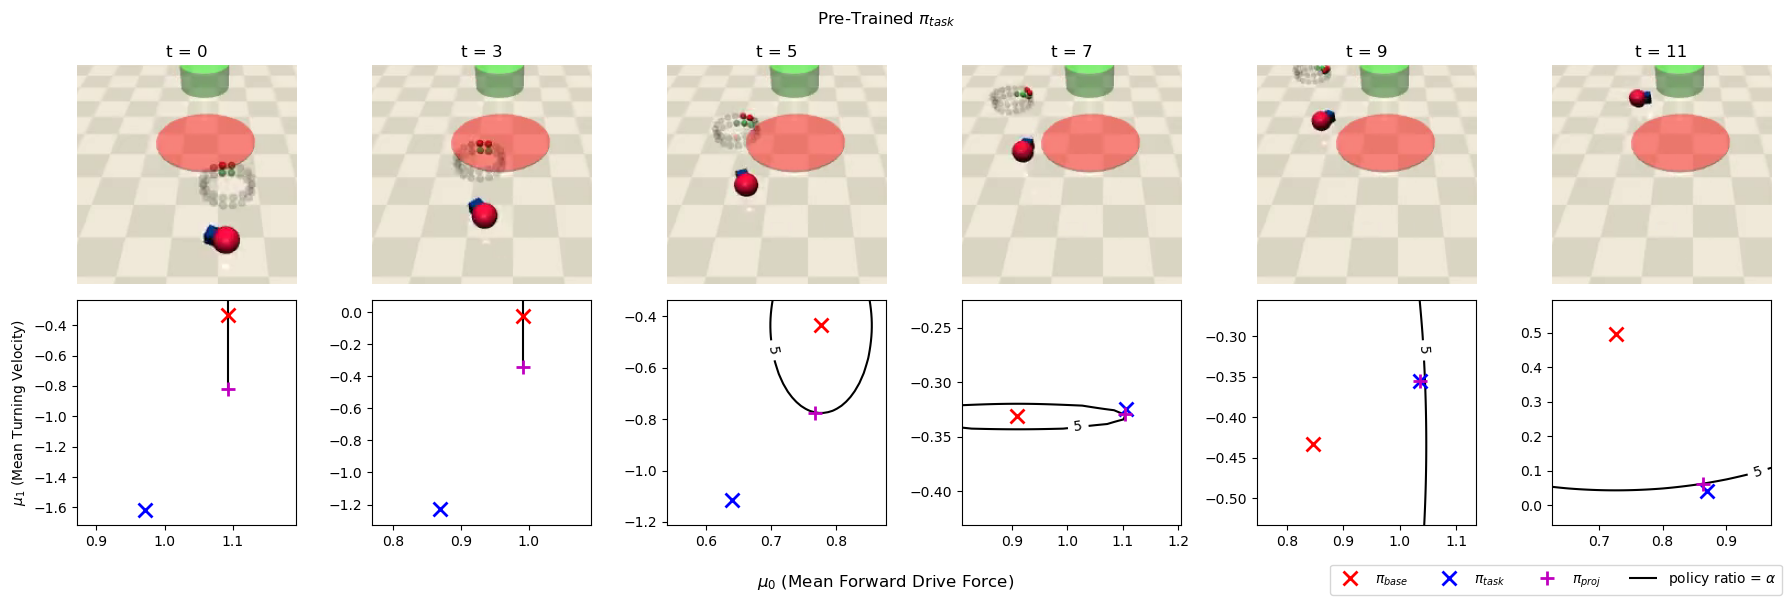

In [4]:
ep = 600
ep_frames = extracted_frames[int(ep / 100)]
timesteps_to_plot = [0, 3, 5, 7, 9, 11]
all_ep_idxs = np.where(policy_projection_database.episode_count == ep)[
    0
]  # np where returns a tuple
# Need to set Nx and Ny high when the feasible set reduces to a line
fig, axs = policy_projection_database.plot_policy_projection_with_frames(
    all_ep_idxs=all_ep_idxs,
    extracted_frames=ep_frames,
    timesteps=timesteps_to_plot,
    plot_cmap=False,
    Nx=50,
    Ny=50,
    marker_size=10,
    marker_edge_width=2,
    fig_size_scale_factor=3.0,
    border=0.1,
    title=r"Pre-Trained $\pi_{task}$",
)
plt.savefig("pretrained_episode.svg")

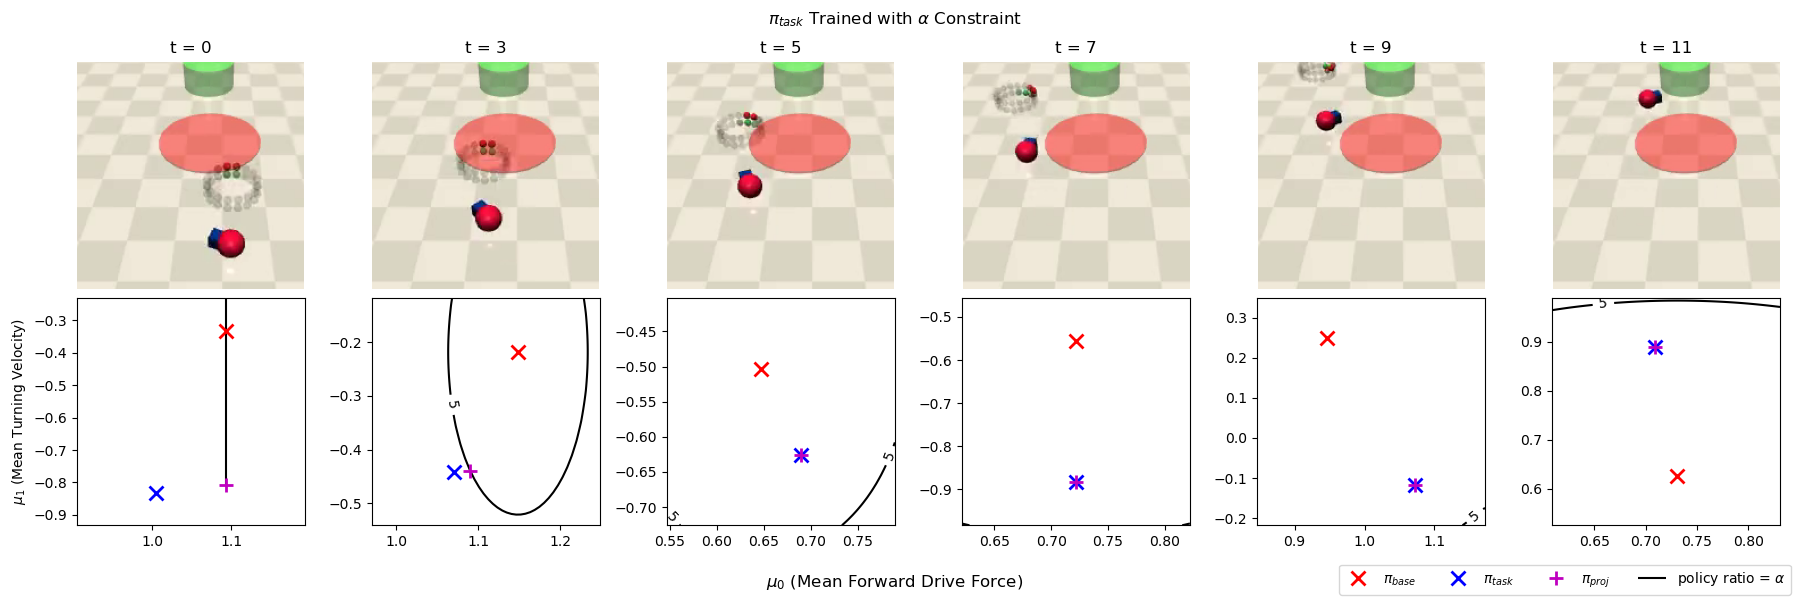

In [5]:
ep = 600
ep_frames = extracted_frames_alpha_task[int(ep / 100)]
timesteps_to_plot = [0, 3, 5, 7, 9, 11]
all_ep_idxs = np.where(policy_projection_database_alpha_task.episode_count == ep)[
    0
]  # np where returns a tuple
# Need to set Nx and Ny high when the feasible set reduces to a line
fig, axs = policy_projection_database_alpha_task.plot_policy_projection_with_frames(
    all_ep_idxs=all_ep_idxs,
    extracted_frames=ep_frames,
    timesteps=timesteps_to_plot,
    plot_cmap=False,
    Nx=50,
    Ny=50,
    marker_size=10,
    marker_edge_width=2,
    fig_size_scale_factor=3.0,
    border=0.1,
    title=r"$\pi_{task}$ Trained with $\alpha$ Constraint",
)
plt.savefig("constrained_episode.svg")